In [23]:
%pip install nltk


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ---------------------------------- ----- 1.3/1.5 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.5 MB/s eta 0:00:00

   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------- ----------------------------- 1/4 [regex]
   -------------------- ------------------- 2/4 [click]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [32]:
%pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


[nltk_data] Downloading package stopwords to C:\Users\Vishal
[nltk_data]     Deep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Shape of dataset: (74682, 4)
Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


C:\Users\Vishal Deep\AppData\Local\Temp\ipykernel_16908\2057512126.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='Set2')


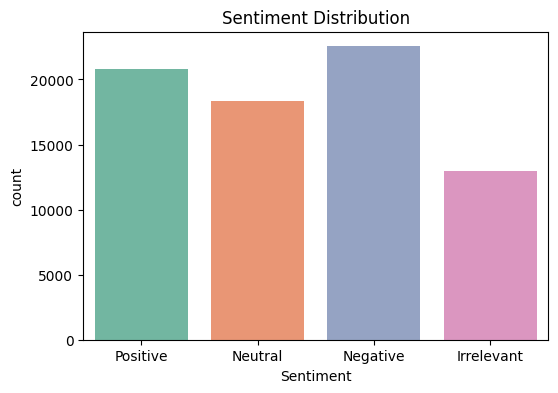

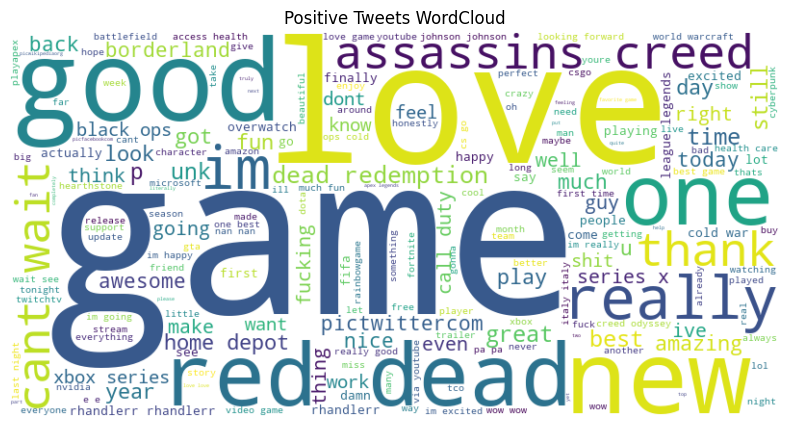

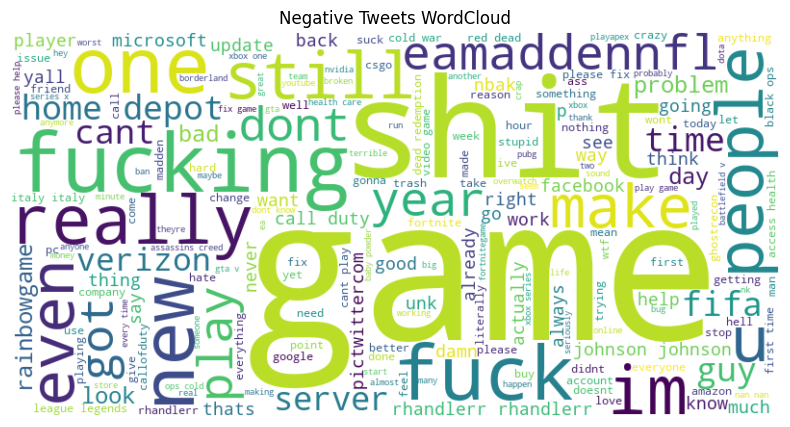

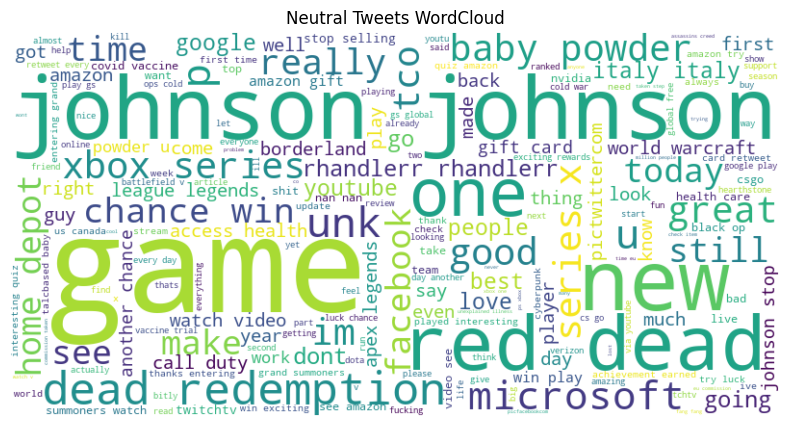

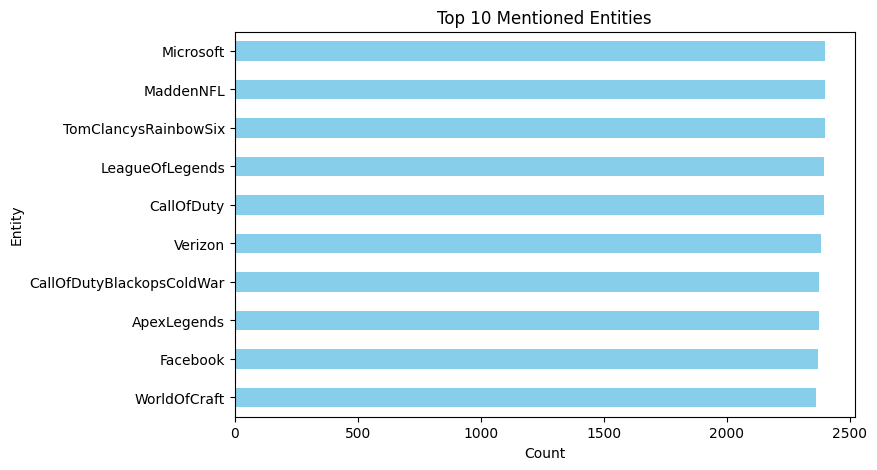

Classification Report:
               precision    recall  f1-score   support

    Negative       0.77      0.76      0.77      4509
     Neutral       0.65      0.66      0.66      3650
    Positive       0.74      0.73      0.74      4180

    accuracy                           0.72     12339
   macro avg       0.72      0.72      0.72     12339
weighted avg       0.72      0.72      0.72     12339



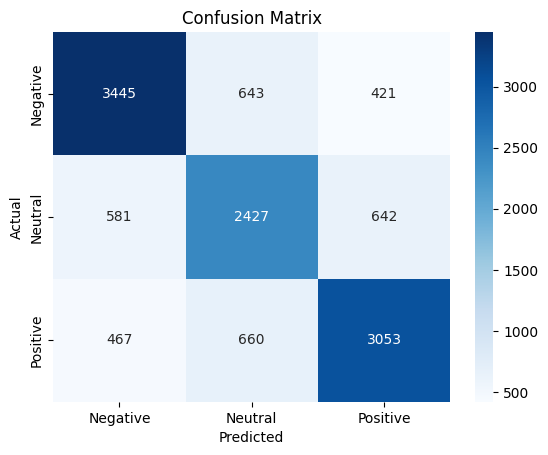

In [33]:
# 📦 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# 📁 2. Load Dataset
df = pd.read_csv('twitter_training.csv', header=None)
df.columns = ["Tweet_ID", "Entity", "Sentiment", "Tweet"]

# 👀 3. Explore Data
print("Shape of dataset:", df.shape)
print(df['Sentiment'].value_counts())

# 🧹 4. Clean Tweets
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = text.split()
    return " ".join([word for word in words if word not in stop_words])

df['Cleaned_Tweet'] = df['Tweet'].astype(str).apply(clean_text)

# 📊 5. Sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sentiment', palette='Set2')
plt.title("Sentiment Distribution")
plt.show()

# ☁️ 6. WordCloud by Sentiment
def show_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(data))
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

show_wordcloud(df[df['Sentiment'] == 'Positive']['Cleaned_Tweet'], "Positive Tweets WordCloud")
show_wordcloud(df[df['Sentiment'] == 'Negative']['Cleaned_Tweet'], "Negative Tweets WordCloud")
show_wordcloud(df[df['Sentiment'] == 'Neutral']['Cleaned_Tweet'], "Neutral Tweets WordCloud")

# 📌 7. Top Entities
plt.figure(figsize=(8,5))
df['Entity'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Mentioned Entities")
plt.xlabel("Count")
plt.gca().invert_yaxis()
plt.show()

# 🤖 8. Model Training: TF-IDF + Logistic Regression
df_model = df[df['Sentiment'].isin(['Positive', 'Negative', 'Neutral'])]  # Remove irrelevant
X = df_model['Cleaned_Tweet']
y = df_model['Sentiment']

tfidf = TfidfVectorizer(max_features=3000)
X_tfidf = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# 📈 9. Model Evaluation
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
